In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from prophet import Prophet

In [2]:
data = pd.read_csv("Agrofood_co2_emission.csv")
year = data['Year']
data = data[data['Area'] == "India"]
data.drop(['Area'], axis=1, inplace=True)
data.set_index('Year', inplace=True)
columns=data.columns

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=columns)


In [4]:
imp = SimpleImputer(strategy='mean')
data = imp.fit_transform(data)
data = pd.DataFrame(data, columns=columns)

In [5]:
df = pd.DataFrame(data=data['total_emission'])
df.rename(columns = {'total_emission':'y'}, inplace = True)
df['ds']=year

In [6]:
df = df.reindex(columns=['ds','y'])

In [7]:
import datetime
df['ds'] = pd.to_datetime(df['ds'], format='%Y')
df['ds']

0    1990-01-01
1    1991-01-01
2    1992-01-01
3    1993-01-01
4    1994-01-01
5    1995-01-01
6    1996-01-01
7    1997-01-01
8    1998-01-01
9    1999-01-01
10   2000-01-01
11   2001-01-01
12   2002-01-01
13   2003-01-01
14   2004-01-01
15   2005-01-01
16   2006-01-01
17   2007-01-01
18   2008-01-01
19   2009-01-01
20   2010-01-01
21   2011-01-01
22   2012-01-01
23   2013-01-01
24   2014-01-01
25   2015-01-01
26   2016-01-01
27   2017-01-01
28   2018-01-01
29   2019-01-01
30   2020-01-01
Name: ds, dtype: datetime64[ns]

In [8]:
from sklearn.model_selection import train_test_split
df_1, df_2 = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
prop = Prophet()
prop.fit(df_1)

14:12:08 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
df_2

,ds,y
27,2017-01-01,0.921164
15,2005-01-01,0.586850
23,2013-01-01,0.825218
17,2007-01-01,0.622532
8,1998-01-01,0.183601
9,1999-01-01,0.192292
29,2019-01-01,1.000000


In [11]:
y = df_2['y']
X = pd.DataFrame(df_2['ds'])
X

,ds
27,2017-01-01
15,2005-01-01
23,2013-01-01
17,2007-01-01
8,1998-01-01
9,1999-01-01
29,2019-01-01


In [12]:
# future = prop.make_future_dataframe(periods=365)
# future

In [13]:
forecast = prop.predict(X)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2,2005-01-01,0.549095,0.457957,0.637332
3,2007-01-01,0.588195,0.503503,0.680041
4,2013-01-01,0.838836,0.749798,0.920794
5,2017-01-01,0.983705,0.899193,1.069902
6,2019-01-01,1.022803,0.947288,1.105766


In [14]:
from sklearn.metrics import mean_squared_error,accuracy_score
print("Test MSE: %.3f" % mean_squared_error(y, forecast['yhat']))

Test MSE: 0.232


c:\Users\Atharva Agrawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Atharva Agrawal\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


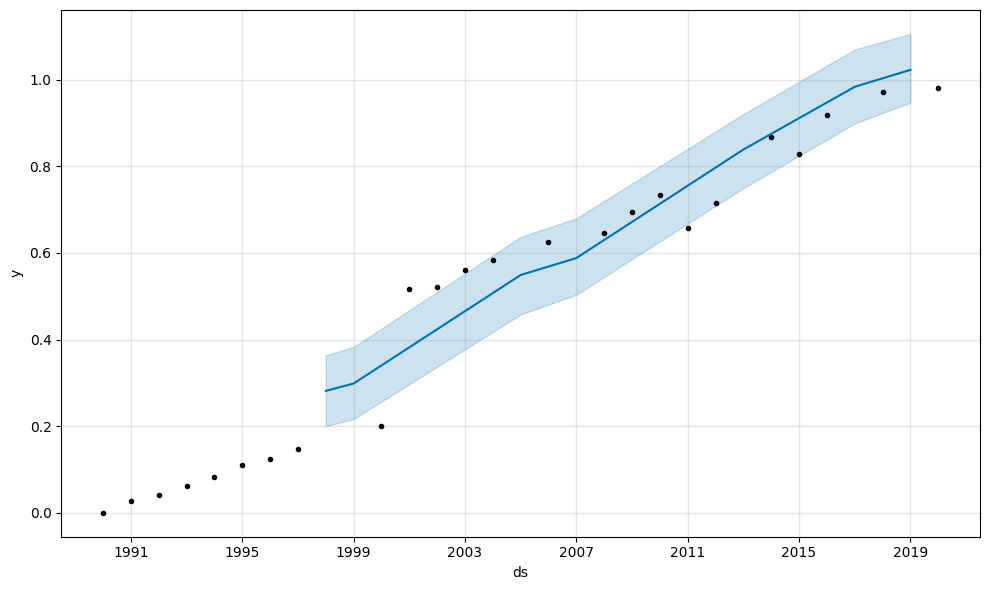

In [15]:
fig1 = prop.plot(forecast)
